In [89]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
def split(df,label):
    X_tr, X_te, Y_tr, Y_te = train_test_split(df, label, test_size=0.25, random_state=42)
    return X_tr, X_te, Y_tr, Y_te

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC

classifiers = ['LinearSVM', 'RadialSVM', 
               'Logistic',  'RandomForest', 
               'AdaBoost',  'DecisionTree', 
               'KNeighbors','GradientBoosting']

models = [svm.SVC(kernel='linear'),
          svm.SVC(kernel='rbf'),
          LogisticRegression(max_iter = 1000),
          RandomForestClassifier(n_estimators=200, random_state=0),
          AdaBoostClassifier(random_state = 0),
          DecisionTreeClassifier(random_state=0),
          KNeighborsClassifier(),
          GradientBoostingClassifier(random_state=0)]


def acc_score(df,label):
    Score = pd.DataFrame({"Classifier":classifiers})
    j = 0
    acc = []
    X_train,X_test,Y_train,Y_test = split(df,label)
    for i in models:
        model = i
        model.fit(X_train,Y_train)
        predictions = model.predict(X_test)
        acc.append(accuracy_score(Y_test,predictions))
        j = j+1     
    Score["Accuracy"] = acc
    Score.sort_values(by="Accuracy", ascending=False,inplace = True)
    Score.reset_index(drop=True, inplace=True)
    return Score

def plot(score,x,y,c = "b"):
    gen = [1,2,3,4,5]
    plt.figure(figsize=(6,4))
    ax = sns.pointplot(x=gen, y=score,color = c )
    ax.set(xlabel="Generation", ylabel="Accuracy")
    ax.set(ylim=(x,y))

In [90]:
def initilization_of_population(size,n_feat):
    population = []
    for i in range(size):
        chromosome = np.ones(n_feat,dtype=np.bool)     
        chromosome[:int(0.3*n_feat)]=False             
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population


def fitness_score(population):
    scores = []
    for chromosome in population:
        logmodel.fit(X_train.iloc[:,chromosome],Y_train)         
        predictions = logmodel.predict(X_test.iloc[:,chromosome])
        scores.append(accuracy_score(Y_test,predictions))
    scores, population = np.array(scores), np.array(population) 
    inds = np.argsort(scores)                                    
    return list(scores[inds][::-1]), list(population[inds,:][::-1]) 


def selection(pop_after_fit,n_parents):
    population_nextgen = []
    for i in range(n_parents):
        population_nextgen.append(pop_after_fit[i])
    return population_nextgen


def crossover(pop_after_sel):
    pop_nextgen = pop_after_sel
    for i in range(0,len(pop_after_sel),2):
        new_par = []
        child_1 , child_2 = pop_nextgen[i] , pop_nextgen[i+1]
        new_par = np.concatenate((child_1[:len(child_1)//2],child_2[len(child_1)//2:]))
        pop_nextgen.append(new_par)
    return pop_nextgen


def mutation(pop_after_cross,mutation_rate,n_feat):   
    mutation_range = int(mutation_rate*n_feat)
    pop_next_gen = []
    for n in range(0,len(pop_after_cross)):
        chromo = pop_after_cross[n]
        rand_posi = [] 
        for i in range(0,mutation_range):
            pos = randint(0,n_feat-1)
            rand_posi.append(pos)
        for j in rand_posi:
            chromo[j] = not chromo[j]  
        pop_next_gen.append(chromo)
    return pop_next_gen

def generations(df,label,size,n_feat,n_parents,mutation_rate,n_gen,X_train,
                                   X_test, Y_train, Y_test):
    best_chromo= []
    best_score= []
    population_nextgen=initilization_of_population(size,n_feat)
    for i in range(n_gen):
        scores, pop_after_fit = fitness_score(population_nextgen)
        print('Best score in generation',i+1,':',scores[:1])  #2
        pop_after_sel = selection(pop_after_fit,n_parents)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross,mutation_rate,n_feat)
        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])
    return best_chromo,best_score

In [91]:
data_bc = pd.read_csv( "Seq_wm.csv")
print(data_bc)

    Unnamed: 0  1  2  3  4  5  6  7  8  9  ...  38  39  40  41  42  43  44  \
0         AD\t  1  0  0  1  0  0  1  1  0  ...   0   1   0   0   0   0   0   
1         AE\t  1  0  0  1  0  0  1  1  0  ...   0   1   0   0   0   0   0   
2         AG\t  0  0  0  0  0  0  0  1  0  ...   0   0   0   0   0   0   1   
3         AP\t  0  0  1  0  0  0  0  0  0  ...   0   0   0   1   0   0   0   
4         AS\t  0  0  0  0  0  0  0  0  1  ...   1   1   0   0   1   0   1   
..         ... .. .. .. .. .. .. .. .. ..  ...  ..  ..  ..  ..  ..  ..  ..   
491       YC\t  0  0  0  0  0  0  1  1  0  ...   0   0   0   0   1   1   0   
492       YD\t  0  0  0  0  0  0  0  0  0  ...   1   0   0   0   0   0   0   
493       YH\t  0  0  1  0  1  0  1  1  0  ...   0   0   0   0   0   1   0   
494       YN\t  0  0  0  0  0  0  0  0  0  ...   1   0   0   0   0   0   0   
495       YS\t  0  0  0  0  0  0  0  0  0  ...   1   0   0   0   0   0   0   

     1.1   0  10.1  
0     19  25     1  
1     19  25     1  


In [92]:
from sklearn.svm import LinearSVC
from sklearn.multiclass import OutputCodeClassifier

label_bc = data_bc["1"]
label_bc = np.where(label_bc == 'M',0,1)
#data_bc.drop(["MCC"],axis = 1,inplace = True)

print("Wild type dataset:\n",data_bc.shape[0],"Records\n",data_bc.shape[1],"Features")
#data_bc = pd.read_csv("Seq_w1.csv")
X=data_bc.iloc[:,1:44].values
y=data_bc.iloc[:,-1].values
#y = np.array(['0','1'])
print(y)
OneVsOneClassifier(LinearSVC(random_state=0)).fit(X, y).predict(X)
clf = OutputCodeClassifier(LinearSVC(random_state=0),
                               code_size=2, random_state=0)
clf.fit(X, y).predict(X)

Wild type dataset:
 496 Records
 48 Features
[1 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0
 0 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0
 0 1 0 0 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0
 0 0 0 0 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0
 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0
 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0
 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 1 1
 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1 1 1 0 0 0
 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0
 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 0
 1 0 0 1 0 0 1 0 1 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1 

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,

In [93]:
data_bc.nunique()

Unnamed: 0    124
1               2
2               2
3               2
4               2
5               2
6               2
7               2
8               2
9               2
10              2
11              2
12              2
13              2
14              2
15              2
16              2
17              2
18              2
19              2
20              2
21              2
22              2
23              2
24              2
25              2
26              2
27              2
28              2
29              2
30              2
31              2
32              2
33              2
34              2
35              2
36              2
37              2
38              2
39              2
40              2
41              2
42              2
43              2
44              2
1.1            19
0              19
10.1            2
dtype: int64

In [94]:
data_bc.shape

(496, 48)

In [95]:
for i in data_bc.columns:
    print("---------------------")
    print(i)
    print("---------------------")
    print(data_bc[i].value_counts())

---------------------
Unnamed: 0
---------------------
AD\t    4
QH\t    4
RT\t    4
RS\t    4
RQ\t    4
       ..
HQ\t    4
HN\t    4
HD\t    4
GV\t    4
YS\t    4
Name: Unnamed: 0, Length: 124, dtype: int64
---------------------
1
---------------------
0    444
1     52
Name: 1, dtype: int64
---------------------
2
---------------------
0    419
1     77
Name: 2, dtype: int64
---------------------
3
---------------------
0    339
1    157
Name: 3, dtype: int64
---------------------
4
---------------------
0    312
1    184
Name: 4, dtype: int64
---------------------
5
---------------------
0    343
1    153
Name: 5, dtype: int64
---------------------
6
---------------------
0    342
1    154
Name: 6, dtype: int64
---------------------
7
---------------------
0    360
1    136
Name: 7, dtype: int64
---------------------
8
---------------------
0    300
1    196
Name: 8, dtype: int64
---------------------
9
---------------------
0    365
1    131
Name: 9, dtype: int64
-----------------

In [96]:
display(data_bc.head())
print("All the features in this dataset have continuous values")

,Unnamed: 0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,1.1,0,10.1
0,AD\t,1,0,0,1,0,0,1,1,0,...,0,1,0,0,0,0,0,19,25,1
1,AE\t,1,0,0,1,0,0,1,1,0,...,0,1,0,0,0,0,0,19,25,1
2,AG\t,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,6,38,0
3,AP\t,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,7,37,0
4,AS\t,0,0,0,0,0,0,0,0,1,...,1,1,0,0,1,0,1,15,29,0


All the features in this dataset have continuous values


In [97]:
display(label_bc)
print("All the features in this dataset have continuous values")

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

All the features in this dataset have continuous values


In [98]:
data_bc.nunique

<bound method DataFrame.nunique of     Unnamed: 0  1  2  3  4  5  6  7  8  9  ...  38  39  40  41  42  43  44  \
0         AD\t  1  0  0  1  0  0  1  1  0  ...   0   1   0   0   0   0   0   
1         AE\t  1  0  0  1  0  0  1  1  0  ...   0   1   0   0   0   0   0   
2         AG\t  0  0  0  0  0  0  0  1  0  ...   0   0   0   0   0   0   1   
3         AP\t  0  0  1  0  0  0  0  0  0  ...   0   0   0   1   0   0   0   
4         AS\t  0  0  0  0  0  0  0  0  1  ...   1   1   0   0   1   0   1   
..         ... .. .. .. .. .. .. .. .. ..  ...  ..  ..  ..  ..  ..  ..  ..   
491       YC\t  0  0  0  0  0  0  1  1  0  ...   0   0   0   0   1   1   0   
492       YD\t  0  0  0  0  0  0  0  0  0  ...   1   0   0   0   0   0   0   
493       YH\t  0  0  1  0  1  0  1  1  0  ...   0   0   0   0   0   1   0   
494       YN\t  0  0  0  0  0  0  0  0  0  ...   1   0   0   0   0   0   0   
495       YS\t  0  0  0  0  0  0  0  0  0  ...   1   0   0   0   0   0   0   

     1.1   0  10.1  
0     1

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,y,test_size=0.15,random_state=0)  

In [100]:
X_train,Y_train

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 1, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        ...,
        [0, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 1, 0, 1],
        [1, 1, 0, ..., 0, 1, 0]], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
        0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
        0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
        1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
        1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 1, 0, 1, 0, 0, 1, 0, 1,

In [101]:
X_test, Y_test

(array([[0, 0, 0, ..., 1, 0, 0],
        [1, 0, 1, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        ...,
        [0, 1, 0, ..., 1, 1, 0],
        [0, 0, 1, ..., 0, 1, 0],
        [1, 1, 0, ..., 0, 1, 0]], dtype=int64),
 array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
        1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
        1, 0, 0, 1, 0, 0, 1, 1, 0], dtype=int64))

In [102]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
import nltk
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.preprocessing  import StandardScaler
from sklearn.metrics import confusion_matrix, matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.datasets import load_digits
digits=load_digits()
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import AdaBoostClassifier

def model_training_testing(data_bc, label_bc):
    classifier = svm.SVC(kernel='linear', gamma='auto', C=5)
    clf = AdaBoostClassifier(random_state=10)
    # use a classification method
    #log = LogisticRegression(max_iter=5000)
    # generate 5-fold cross-validated estimates for each input data point
    # compute predicted probability instead of label.
    return cross_val_predict(classifier,data_bc, label_bc, cv=5)
                            

def compute_classification_evaluation_metrics(probabilities, label_bc):
    # determine y_true and y_predicted.
    y_true = [] # store true label of records
    y_predict1_auc = [] # store class 1 probabilities
    y_predict1_acc = [] # store predicted label
    for j in range(len(label_bc)):
        y_true.append(label_bc[j])
        y_predict1_auc.append(probabilities[j])  # class 1 probabilities
        y_predict1_acc.append(round(probabilities[j]))   # predicted label

    # compute confusion matrix
    tn,fp,fn,tp = confusion_matrix(y_true, y_predict1_acc).ravel()
    #fp = confusion_matrix(y_true, y_predict1_acc).ravel()
    #fn = confusion_matrix(y_true, y_predict1_acc).ravel()
    #tp = confusion_matrix(y_true, y_predict1_acc).ravel()
    print("tn, fp, fn, tp ---> ", tn, fp, fn, tp)
   
    # accuracy
    acc = accuracy_score(y_true, y_predict1_acc)
    print("Accuracy ---> {0}".format(acc))

    #AUC-ROC
    #roc = roc_auc_score(y_true, y_predict1_acc)
    #print("AUC-ROC ---> {0}".format(roc))

    # Matthews correlation coefficient (MCC)
    mcc = matthews_corrcoef(y_true, y_predict1_acc)
    print("MCC ---> {0}".format(mcc))

    # sensitivity, recall, hit rate, or true positive rate (TPR)
    tpr1 = tp/(tp + fn)
    print("Recall/Sensitivity ---> {0}".format(tpr1))

    # specificity, selectivity or true negative rate (TNR)
    tnr = tn/(tn + fp)
    print("Specificity ---> {0}".format(tnr))

    # precision or positive predictive value (PPV)
    ppv = tp/(tp + fp)
    print("Precision ---> {0}".format(ppv))

    # negative predictive value (NPV)
    npv = tn/(tn + fn)
    print("Negative Predictive Value ---> {0}".format(npv))

    # miss rate or false negative rate (FNR)
    fnr = 1 - tpr1
    print("False Negative Rate ---> {0}".format(fnr))

    # fall-out or false positive rate (FPR)
    fpr1 = 1- tnr
    print("False Positive Rate ---> {0}".format(fpr1))

    # false discovery rate (FDR)
    fdr = 1 - ppv
    print("False Discovery Rate ---> {0}".format(fdr))

    # false omission rate (FOR)
    fomr = 1 - npv
    print("False Omission Rate ---> {0}".format(fomr))

    # F1 score - harmonic mean of precision and recall [2*tp/(2*tp + fp + fn)]
    f1 = 2* ppv * tpr1/(ppv + tpr1)
    print("F1 Score ---> {0}".format(f1))


if __name__ == '__main__':
    """
    This program will compute several evaluation metrics that are used in classification algorithms. 
    """
   
    data_bc = pd.read_csv("Seq_wm.csv")
    X=data_bc.iloc[:,1:20].values
    y=data_bc.iloc[:,-1].values
    #X = data_bc.data
    #y = data_bc.target     # binary label 0 and 1
   
    clf = AdaBoostClassifier(random_state=15)
    clf.fit(X_train,Y_train)
    clf.score(X_train, Y_train)
    #y_predict1_acc(X_test)
    # get classification results
    predicted_probs1 = model_training_testing(X, y)

    # compute classification evaluation metrics
    compute_classification_evaluation_metrics(predicted_probs1, y)


tn, fp, fn, tp --->  295 24 49 128
Accuracy ---> 0.8528225806451613
MCC ---> 0.6732993549651862
Recall/Sensitivity ---> 0.7231638418079096
Specificity ---> 0.9247648902821317
Precision ---> 0.8421052631578947
Negative Predictive Value ---> 0.8575581395348837
False Negative Rate ---> 0.2768361581920904
False Positive Rate ---> 0.07523510971786829
False Discovery Rate ---> 0.1578947368421053
False Omission Rate ---> 0.1424418604651163
F1 Score ---> 0.7781155015197568


In [103]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import nltk

from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.preprocessing  import StandardScaler
from sklearn.metrics import confusion_matrix, matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.datasets import load_digits
digits=load_digits()
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def model_training_testing(data_bc, label_bc):
    # use a classification method
    log = LogisticRegression(max_iter=500)
    clf = AdaBoostClassifier(random_state=10)
    # generate 5-fold cross-validated estimates for each input data point
    # compute predicted probability instead of label.
    return cross_val_predict(log, data_bc, label_bc, cv=5, method='predict_proba')

def compute_classification_evaluation_metrics(probabilities, label_bc):
    # determine y_true and y_predicted.
    y_true = [] # store true label of records
    y_predict2_auc = [] # store class 1 probabilities
    y_predict2_acc = [] # store predicted label
    for j in range(len(label_bc)):
        y_true.append(label_bc[j])
        y_predict2_auc.append(probabilities[j][1])  # class 1 probabilities
        y_predict2_acc.append(round(probabilities[j][1]))   # predicted label

    # compute confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_predict2_acc).ravel()
    print("tn, fp, fn, tp ---> ", tn, fp, fn, tp)

    # accuracy
    acc = accuracy_score(y_true, y_predict2_acc)
    print("Accuracy ---> {0}".format(acc))

    # AUC-ROC
    #roc = roc_auc_score(y_true, y_predict2_acc)
    #print("AUC-ROC ---> {0}".format(roc))

    # Matthews correlation coefficient (MCC)
    mcc = matthews_corrcoef(y_true, y_predict2_acc)
    print("MCC ---> {0}".format(mcc))

    # sensitivity, recall, hit rate, or true positive rate (TPR)
    tpr2 = tp/(tp + fn)
    print("Recall/Sensitivity ---> {0}".format(tpr2))

    # specificity, selectivity or true negative rate (TNR)
    tnr = tn/(tn + fp)
    print("Specificity ---> {0}".format(tnr))

    # precision or positive predictive value (PPV)
    ppv = tp/(tp + fp)
    print("Precision ---> {0}".format(ppv))

    # negative predictive value (NPV)
    npv = tn/(tn + fn)
    print("Negative Predictive Value ---> {0}".format(npv))

    # miss rate or false negative rate (FNR)
    fnr = 1 - tpr2
    print("False Negative Rate ---> {0}".format(fnr))

    # fall-out or false positive rate (FPR)
    fpr2 = 1- tnr
    print("False Positive Rate ---> {0}".format(fpr2))

    # false discovery rate (FDR)
    fdr = 1 - ppv
    print("False Discovery Rate ---> {0}".format(fdr))

    # false omission rate (FOR)
    fomr = 1 - npv
    print("False Omission Rate ---> {0}".format(fomr))

    # F1 score - harmonic mean of precision and recall [2*tp/(2*tp + fp + fn)]
    f1 = 2* ppv * tpr2/(ppv + tpr2)
    print("F1 Score ---> {0}".format(f1))


if __name__ == '__main__':
    """
    This program will compute several evaluation metrics that are used in classification algorithms. 
    """
    
    data_bc = pd.read_csv("Seq_wm.csv")
    X=data_bc.iloc[:,1:20].values
    y=data_bc.iloc[:,-1].values
    #X = dataset.dataset
    #y = dataset.target     # binary label 0 and 1
    clf = AdaBoostClassifier(random_state=5)
    clf.fit(X_train,Y_train)
    clf.score(X_train, Y_train)
    # get classification results
    
    predicted_probs2 = model_training_testing(X, y)

    # compute classification evaluation metrics
    compute_classification_evaluation_metrics(predicted_probs2, y)
    

tn, fp, fn, tp --->  299 20 47 130
Accuracy ---> 0.8649193548387096
MCC ---> 0.7006759145747674
Recall/Sensitivity ---> 0.7344632768361582
Specificity ---> 0.9373040752351097
Precision ---> 0.8666666666666667
Negative Predictive Value ---> 0.8641618497109826
False Negative Rate ---> 0.2655367231638418
False Positive Rate ---> 0.06269592476489028
False Discovery Rate ---> 0.1333333333333333
False Omission Rate ---> 0.13583815028901736
F1 Score ---> 0.7951070336391436


In [104]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
import nltk

from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.preprocessing  import StandardScaler
from sklearn.metrics import confusion_matrix, matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.datasets import load_digits
digits=load_digits()
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def model_training_testing(data_bc, label_bc):
    rf = RandomForestClassifier(random_state=30,criterion="entropy",n_estimators=500, max_depth=20, n_jobs=15)
    clf = AdaBoostClassifier(random_state=30)
    # use a classification method
    #log = LogisticRegression(max_iter=5000)
    # generate 5-fold cross-validated estimates for each input data point
    # compute predicted probability instead of label.
    return cross_val_predict(rf, data_bc, label_bc, cv=5, method='predict_proba')

def compute_classification_evaluation_metrics(probabilities, label_bc):
    # determine y_true and y_predicted.
    # store true label of records
    y_true = [] 
    y_predict3_auc = [] # store class 1 probabilities
    y_predict3_acc = [] # store predicted label
    for j in range(len(label_bc)):
        y_true.append(label_bc[j])
        y_predict3_auc.append(probabilities[j][1])  # class 1 probabilities
        y_predict3_acc.append(round(probabilities[j][1]))   # predicted label

    # compute confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_true, y_predict3_acc).ravel()
    print("tn, fp, fn, tp ---> ", tn, fp, fn, tp)

    # accuracy
    acc = accuracy_score(y_true, y_predict3_acc)
    print("Accuracy ---> {0}".format(acc))

    # AUC-ROC
    #roc = roc_auc_score(y_true, y_predict3_acc)
    #print("AUC-ROC ---> {0}".format(roc))

    # Matthews correlation coefficient (MCC)
    mcc = matthews_corrcoef(y_true, y_predict3_acc)
    print("MCC ---> {0}".format(mcc))

    # sensitivity, recall, hit rate, or true positive rate (TPR)
    tpr2 = tp/(tp + fn)
    print("Recall/Sensitivity ---> {0}".format(tpr2))

    # specificity, selectivity or true negative rate (TNR)
    tnr = tn/(tn + fp)
    print("Specificity ---> {0}".format(tnr))

    # precision or positive predictive value (PPV)
    ppv = tp/(tp + fp)
    print("Precision ---> {0}".format(ppv))

    # negative predictive value (NPV)
    npv = tn/(tn + fn)
    print("Negative Predictive Value ---> {0}".format(npv))

    # miss rate or false negative rate (FNR)
    fnr = 1 - tpr2
    print("False Negative Rate ---> {0}".format(fnr))

    # fall-out or false positive rate (FPR)
    fpr2 = 1- tnr
    print("False Positive Rate ---> {0}".format(fpr2))

    # false discovery rate (FDR)
    fdr = 1 - ppv
    print("False Discovery Rate ---> {0}".format(fdr))

    # false omission rate (FOR)
    fomr = 1 - npv
    print("False Omission Rate ---> {0}".format(fomr))

    # F1 score - harmonic mean of precision and recall [2*tp/(2*tp + fp + fn)]
    f1 = 2* ppv * tpr2/(ppv + tpr2)
    print("F1 Score ---> {0}".format(f1))


if __name__ == '__main__':
    """
    This program will compute several evaluation metrics that are used in classification algorithms. 
    """
    
    data_bc = pd.read_csv("Seq_wm.csv")
    X=data_bc.iloc[:,1:50].values
    y=data_bc.iloc[:,-1].values
    #X = dataset.data
    #y = dataset.target     # binary label 0 and 1
    clf = AdaBoostClassifier(random_state=10)
    clf.fit(X_train,Y_train)
    clf.score(X_train, Y_train)
    # get classification results
    predicted_probs3 = model_training_testing(X, y)

    # compute classification evaluation metrics
    compute_classification_evaluation_metrics(predicted_probs3, y)
    


tn, fp, fn, tp --->  317 2 0 177
Accuracy ---> 0.9959677419354839
MCC ---> 0.9912755794825956
Recall/Sensitivity ---> 1.0
Specificity ---> 0.9937304075235109
Precision ---> 0.9888268156424581
Negative Predictive Value ---> 1.0
False Negative Rate ---> 0.0
False Positive Rate ---> 0.006269592476489061
False Discovery Rate ---> 0.011173184357541888
False Omission Rate ---> 0.0
F1 Score ---> 0.9943820224719102


In [105]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# logistic regression
classifier = svm.SVC(kernel='linear', gamma='auto', C=4)
classifier.fit(X_train, Y_train)

log=LogisticRegression(random_state=0)
log.fit(X_train, Y_train)

rf = RandomForestClassifier(random_state=0,criterion="entropy",n_estimators=500, max_depth=5, n_jobs=4)
rf.fit(X_train, Y_train)


# predict probabilities
y_predict1 = classifier.predict(X_test)
y_predict2 = log.predict(X_test)
y_predict3 = rf.predict(X_test)


In [106]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1 = roc_curve(Y_test, y_predict1[:,], pos_label=1)
fpr2 = roc_curve(Y_test, y_predict2[:,], pos_label=1)
fpr3 = roc_curve(Y_test, y_predict3[:,], pos_label=1)

tpr1 = roc_curve(Y_test, y_predict1[:,], pos_label=1)
tpr2 = roc_curve(Y_test, y_predict2[:,], pos_label=1)
tpr3 = roc_curve(Y_test, y_predict3[:,], pos_label=1)

thresh1 = roc_curve(Y_test, y_predict1[:,], pos_label=1)
thresh2 = roc_curve(Y_test, y_predict2[:,], pos_label=1)
thresh3 = roc_curve(Y_test, y_predict3[:,], pos_label=1)

fpr1, tpr1, thresh1 = roc_curve(Y_test, y_predict1[:,], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(Y_test, y_predict2[:,], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(Y_test, y_predict3[:,], pos_label=1)



# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(Y_test))]
p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)

In [107]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(Y_test, y_predict1[:,])
auc_score2 = roc_auc_score(Y_test, y_predict2[:,])
auc_score3 = roc_auc_score(Y_test, y_predict3[:,])

print(auc_score1, auc_score2, auc_score3)

1.0 0.9666666666666667 0.8166666666666667


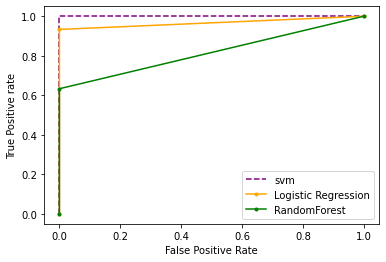

In [108]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-bright')


# plot roc curves
plt.plot(fpr1, tpr1,  linestyle ='--',color='purple', label='svm')
plt.plot(fpr2, tpr2,  marker ='.',color='orange', label='Logistic Regression')
plt.plot(fpr3, tpr3,  marker ='.',color='green', label='RandomForest')
#plt.plot(p_fpr, p_tpr, linestyle='--', color='black')
# title

# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
auc_score1 = metrics.roc_auc_score(Y_test, y_predict1)
auc_score2 = metrics.roc_auc_score(Y_test, y_predict2)
auc_score3 = metrics.roc_auc_score(Y_test, y_predict3)



plt.legend()
plt.savefig('ROC',dpi=300)
plt.show();
